In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [11]:
import glob
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Prepare data

In [3]:
#get all paths
paths = glob.glob('./notMNIST_small/*/*.png')

#random shuffle
paths = np.random.permutation(pasths)

#read the file
x_train = np.array([plt.imread(paths[i]) for i in range(len(paths))])
y_train = np.array([paths[i].split('/')[-2] for i in range(len(paths))])

print(x_train.shape, y_train.shape)

(18724, 28, 28) (18724,)


In [4]:
y_train[0:10]

array(['C', 'C', 'B', 'B', 'C', 'B', 'C', 'E', 'B', 'F'], dtype='<U1')

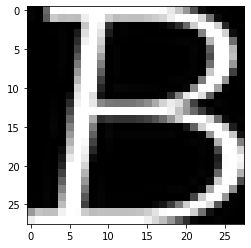

In [7]:
plt.imshow(x_train[5], cmap='gray')

In [8]:
x_train = x_train.reshape(18724, 28, 28, 1)
y_train = pd.get_dummies(y_train)
print(x_train.shape, y_train.shape)

(18724, 28, 28, 1) (18724, 10)


## 2. Build Model

In [15]:
X = tf.keras.layers.Input(shape = [28, 28, 1])

# Conv2D(number of filter set, size of filter set, activation function)
# 6 Channel feature map
H = tf.keras.layers.Conv2D(6, kernel_size = 5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

# 16 Channel feature map
H = tf.keras.layers.Conv2D(16, kernel_size = 5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

## 3. Train Model

In [17]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
586/586 [==============================] - 9s 3ms/step - loss: 0.8589 - accuracy: 0.7613
Epoch 2/10
586/586 [==============================] - 2s 3ms/step - loss: 0.2743 - accuracy: 0.9166
Epoch 3/10
586/586 [==============================] - 2s 3ms/step - loss: 0.2022 - accuracy: 0.9379
Epoch 4/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.9519
Epoch 5/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1226 - accuracy: 0.9593
Epoch 6/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1017 - accuracy: 0.9681
Epoch 7/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0782 - accuracy: 0.9747
Epoch 8/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0609 - accuracy: 0.9801
Epoch 9/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0465 - accuracy: 0.9843
Epoch 10/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0396 - accuracy: 0.9872

In [ ]:
pred = model.predict(x_train[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_train[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
